In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
galton = Table.read_table('https://raw.githubusercontent.com/AUP-CS2091/class/master/week3/galton.csv')
lw = Table.read_table('https://raw.githubusercontent.com/AUP-CS2091/class/master/week10/little_women.csv')
sat = Table.read_table('https://raw.githubusercontent.com/AUP-CS2091/class/master/week10/sat2014.csv')
heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight')
    )
def predict_child(mpht):
    """Return a prediction of the height of a child 
    whose parents have a midparent height of mpht.
    
    The prediction is the average height of the children 
    whose midparent height is in the range mpht plus or minus 0.5 inches.
    """
    
    close_points = heights.where('MidParent', are.between(mpht-0.5, mpht + 0.5))
    return close_points.column('Child').mean()   
def r_scatter(r):
    plots.figure(figsize=(5,5))
    "Generate a scatter plot with a correlation approximately r"
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    plots.scatter(x, y)
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)

In [4]:
nonlinear_x = np.arange(-4,4.1,1)
nonlinear_y = nonlinear_x ** 2

In [5]:
nonlinear_x

array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.])

In [6]:
nonlinear_y

array([16.,  9.,  4.,  1.,  0.,  1.,  4.,  9., 16.])

In [7]:
nonlinear = Table().with_column("x", nonlinear_x).with_column("y",nonlinear_y)

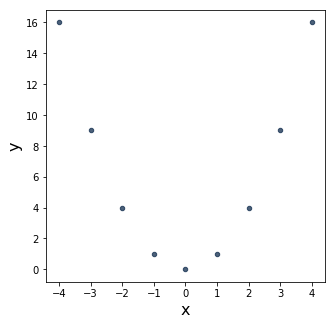

In [8]:
nonlinear.scatter(0)

In [9]:
def to_su(values):
    mean = np.mean(values)
    std = np.std(values)
    return (values - mean)/std
def columns_to_su(table, columns):
    for column in columns:
        table = table.with_column(column + " (SU)", to_su(table.column(column)))
    return table
def compute_r(table, colx, coly):
    table_su = columns_to_su(table.select(colx,coly), [colx, coly])
    colx_su = table_su.column(2)
    coly_su = table_su.column(3)
    return np.mean(colx_su * coly_su)

In [10]:
compute_r(nonlinear,"x","y")

0.0

In [17]:
outliers_x = np.arange(0,5.1,1)
outliers_y = np.append(np.arange(0,4.1,1),0)
outliers_x

array([0., 1., 2., 3., 4., 5.])

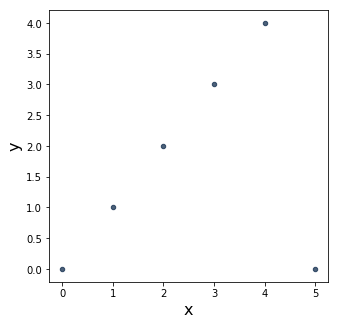

In [18]:
outliers = Table().with_column("x", outliers_x).with_column("y",outliers_y)
outliers.scatter(0)

In [19]:
compute_r(outliers,"x","y")

0.3273268353539886

In [20]:
sat

State,Participation Rate,Critical Reading,Math,Writing,Combined
North Dakota,2.3,612,620,584,1816
Illinois,4.6,599,616,587,1802
Iowa,3.1,605,611,578,1794
South Dakota,2.9,604,609,579,1792
Minnesota,5.9,598,610,578,1786
Michigan,3.8,593,610,581,1784
Wisconsin,3.9,596,608,578,1782
Missouri,4.2,595,597,579,1771
Wyoming,3.3,590,599,573,1762
Kansas,5.3,591,596,566,1753


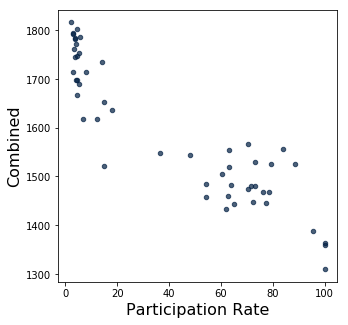

In [21]:
sat.scatter("Participation Rate","Combined")

In [22]:
compute_r(sat, "Participation Rate","Combined")

-0.9111376507316862

In [23]:
compute_r(sat,"Critical Reading", "Writing")

0.989594893345872

In [24]:
compute_r(sat,"Critical Reading", "Math")

0.9847558411067433

In [41]:
heights_with_prediction = heights.with_column("Galton Prediction", heights.apply(predict_child, "MidParent"))


In [26]:
heights_with_prediction

MidParent,Child,Prediction
75.43,73.2,70.1
75.43,69.2,70.1
75.43,69,70.1
75.43,69,70.1
73.66,73.5,70.4158
73.66,72.5,70.4158
73.66,65.5,70.4158
73.66,65.5,70.4158
72.06,71,68.5025
72.06,68,68.5025


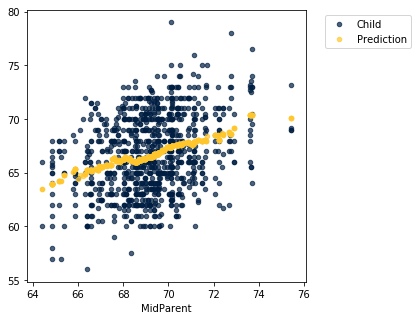

In [27]:
heights_with_prediction.scatter(0)

In [47]:
def slope(table, colx, coly):
    r = compute_r(table, colx, coly)
    std_x = np.std(table.column(colx))
    std_y = np.std(table.column(coly))
    return (r * std_y) / std_x
slope(heights, "MidParent", "Child")

0.637360896969479

In [50]:
def intercept(table, colx, coly):
    slope_t = slope(table, colx, coly)
    avg_x = np.average(table.column(colx))
    avg_y = np.average(table.column(coly))
    return avg_y - slope_t * avg_x
intercept(heights, "MidParent", "Child")

22.63624054958975

In [33]:
mp = 69
heights_slope = slope(heights, "MidParent", "Child")
heights_intercept = intercept(heights, "MidParent", "Child")

predicition_child = mp * heights_slope + heights_intercept
predicition_child

66.29846962853051

In [51]:
def rmse(table, colx, coly, s_slope, s_intercept):
    predictions = table.column(colx) * s_slope + s_intercept
    sq_differences = (table.column(coly) - predictions) ** 2
    mean_errors = np.mean(sq_differences)
    return mean_errors ** 0.5

rmse(heights, "MidParent", "Child", 0.637360896969479, 22.63624054958975)

3.388079916395342

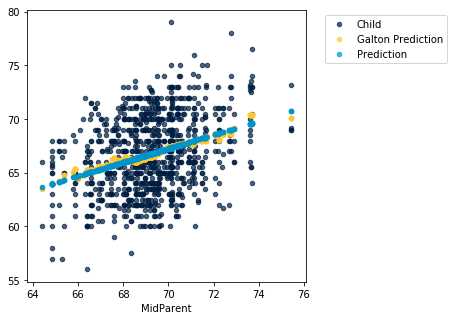

In [53]:
def paint_line(table, colx, coly, s_slope, s_intercept):
    predictions = table.column(colx) * s_slope + s_intercept
    table_n = table.with_column("Prediction", predictions)
    table_n.scatter(colx)
paint_line(heights_with_prediction, "MidParent", "Child", 0.637360896969479, 22.63624054958975)

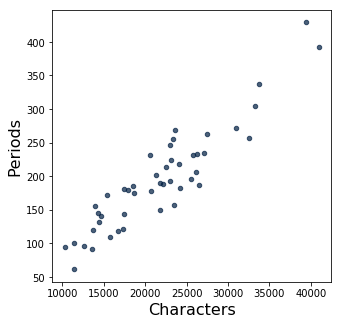

In [55]:
lw.scatter(0)

In [56]:
compute_r(lw, "Characters", "Periods")

0.9229576895854816

In [60]:
lw_slope = slope(lw, "Characters", "Periods")
lw_slope

0.009793884102448892

In [61]:
lw_intercept = intercept(lw, "Characters", "Periods")
lw_intercept

-17.609166235100787

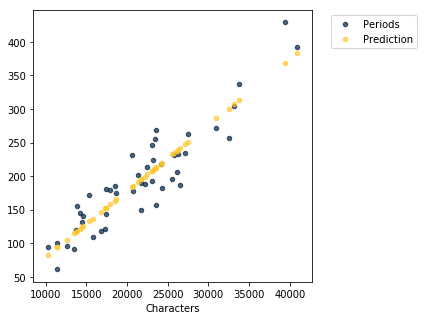

In [62]:
paint_line(lw, "Characters", "Periods", lw_slope, lw_intercept)

In [65]:
rmse(lw, "Characters", "Periods", lw_slope, lw_intercept)

28.66875343319603

In [67]:
rmse(lw, "Characters", "Periods", lw_slope+0.01, lw_intercept-10)

220.34395898619792

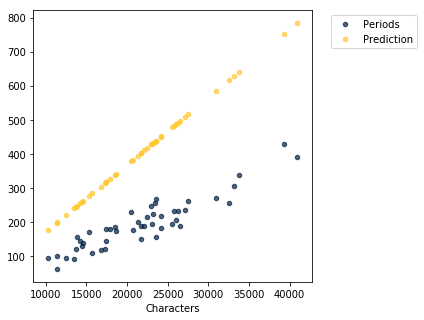

In [68]:
paint_line(lw, "Characters", "Periods", lw_slope+0.01, lw_intercept-10)

In [72]:
def mse(table, colx, coly, s_slope, s_intercept):
    predictions = table.column(colx) * s_slope + s_intercept
    sq_differences = (table.column(coly) - predictions) ** 2
    mean_errors = np.mean(sq_differences)
    return mean_errors

mse(lw, "Characters", "Periods", lw_slope, lw_intercept)

821.8974234133892

In [75]:
def lw_mse(s_slope, s_intercept):
    return mse(lw, "Characters", "Periods", s_slope, s_intercept)
lw_mse(lw_slope, lw_intercept)

821.8974234133892

In [78]:
min_values = minimize(lw_mse)

In [79]:
original_values = make_array(lw_slope, lw_intercept)

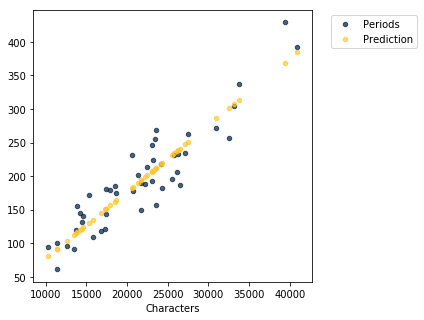

In [80]:
paint_line(lw, "Characters", "Periods", min_values.item(0), min_values.item(1))

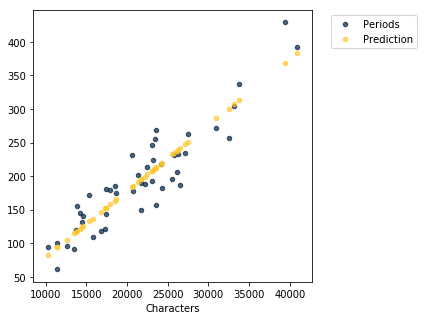

In [81]:
paint_line(lw, "Characters", "Periods", original_values.item(0), original_values.item(1))